In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
df = pd.read_csv("/Users/lilieven/Documents/Master/Dataliteracy_2/testlizenz-tuebingen-dataliteracy4students_1701258214900/testlizenz-tuebingen-dataliteracy4students_1701258214900.csv", sep=";", encoding='unicode_escape', decimal=",")


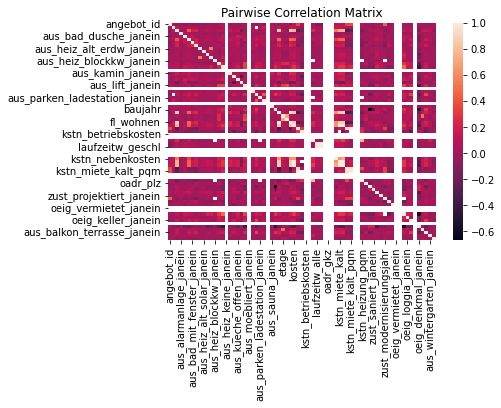

In [49]:

def remove_non_number_types(df):
    df_copy = pd.DataFrame()
    for col in df.columns:
        allowed= ["int64", "float64"]
        if str(df[col].dtype) in allowed:
            df_copy[col] = df[col]
    return df_copy

df_copy = remove_non_number_types(df)
#df_copy.info(verbose=True)
correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix)
plt.title('Pairwise Correlation Matrix')
plt.show()

# for column in  df_copy.columns:
#     for other_column in df_copy.columns:
#         index = pd.notna(df_copy[column]) & pd.notna(df_copy[other_column])
#         correlation = df_copy[column][index].corr(df_copy[other_column][index])
        
#         print(f"Correlation between {column} and {other_column}: {correlation}")



# sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Pairwise Correlation Matrix')
# plt.show()


#correlation_matrix = df_no_na.corr()





<AxesSubplot:>

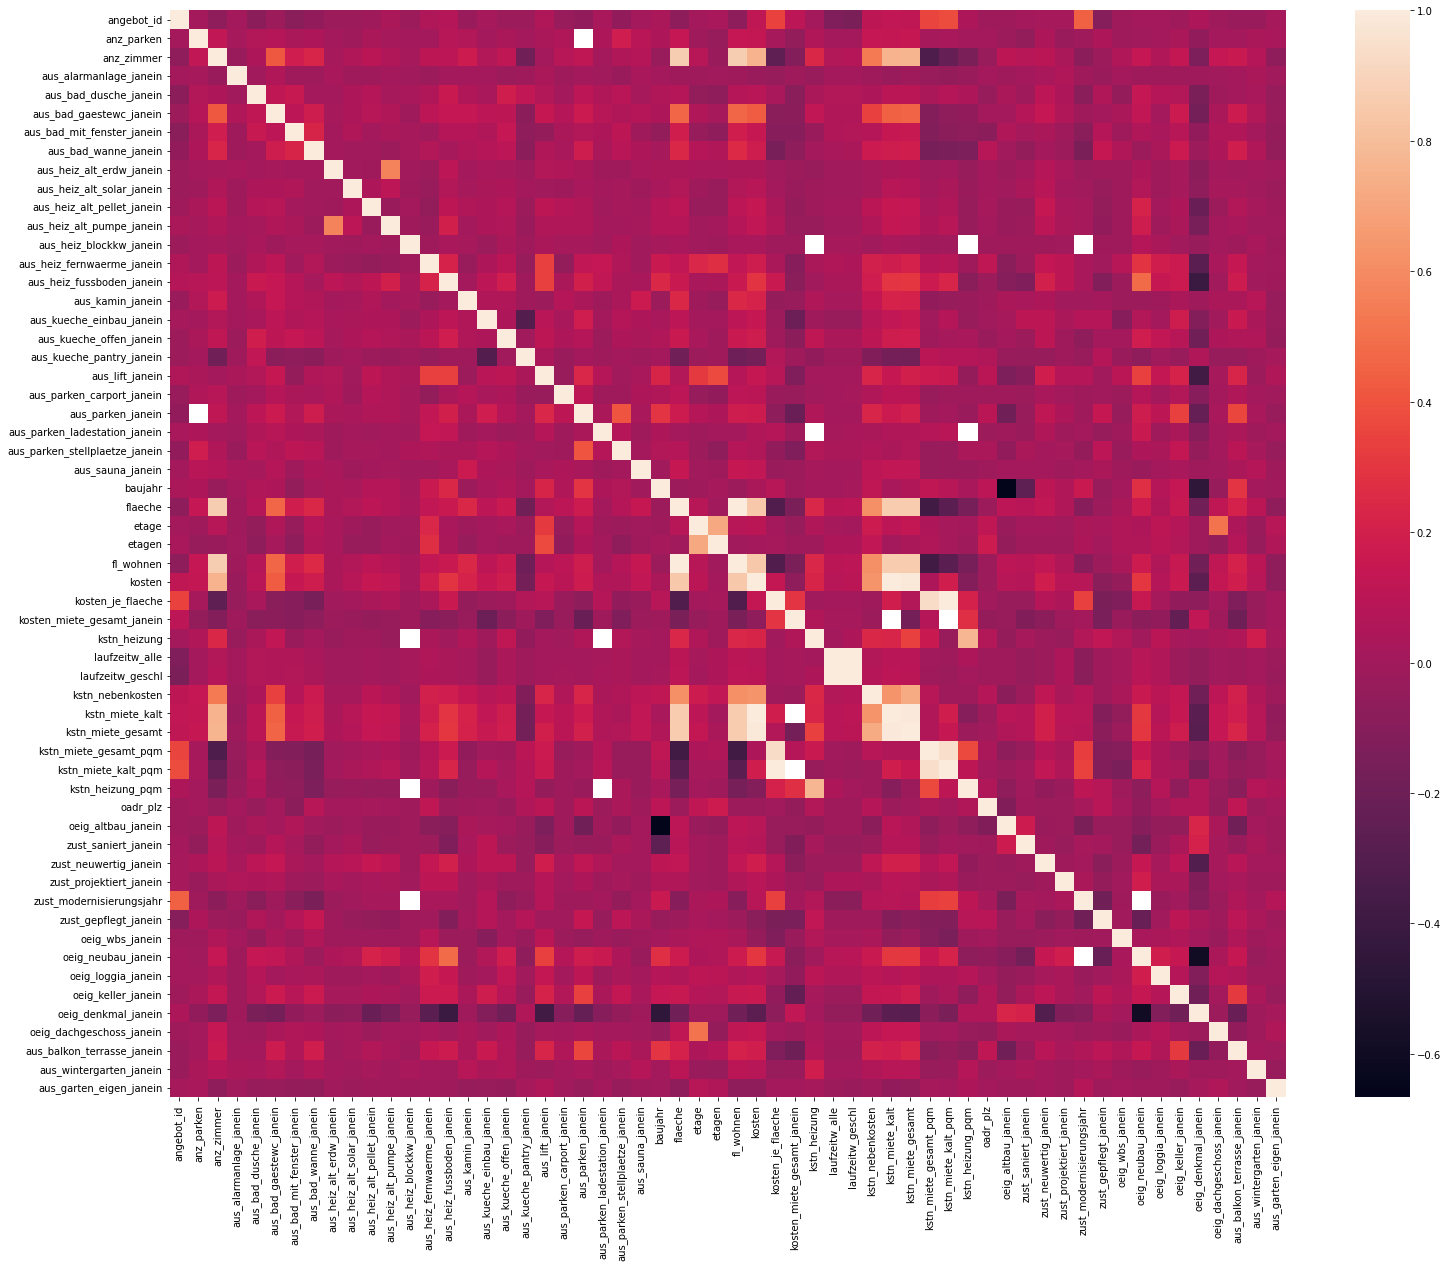

In [45]:
df_num = df.select_dtypes('number')
corr = df_num.corr()
corr_na_col_missing = corr.dropna(axis=1, how='all')
corr_na_missing = corr_na_col_missing.dropna(how='all')
plt.subplots(figsize=(25,20))
sns.heatmap(corr_na_missing)
#df_num.info(verbose=True)

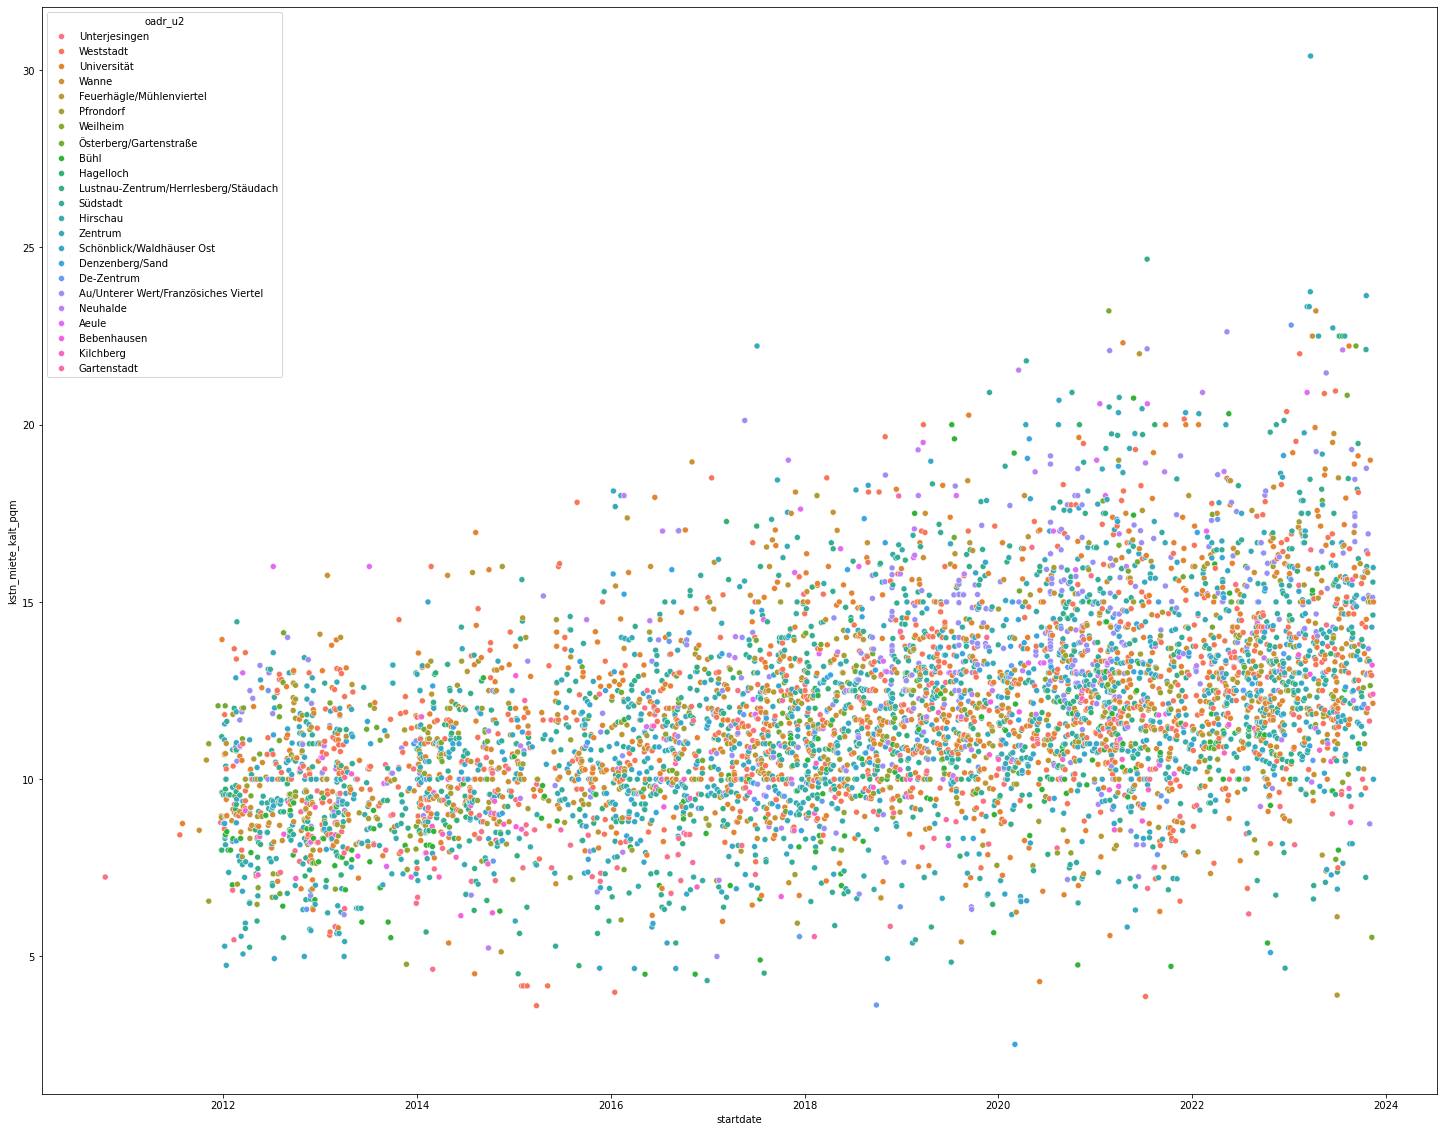

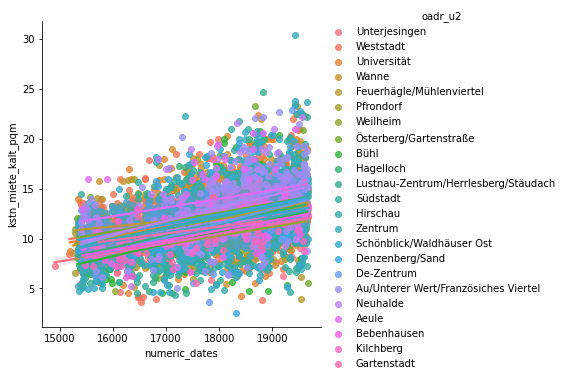

In [102]:
import datetime
from matplotlib.dates import date2num

df['kstn_miete_kalt_pqm'].dropna(inplace=True)
oadr_u2 = df["oadr_u2"].unique().tolist()

df['startdate'] = pd.to_datetime(df['startdate'])
df = df.sort_values(by='startdate')
#[datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in df['startdate']]

#scatterplot
plt.subplots(figsize=(25, 20))
scatter_plot = sns.scatterplot(data=df, x="startdate", y="kstn_miete_kalt_pqm", hue="oadr_u2")

#liner regression
numeric_dates = date2num(df['startdate'])
df['numeric_dates'] = numeric_dates
lin_reg = sns.lmplot(x="numeric_dates", y="kstn_miete_kalt_pqm", hue="oadr_u2", data=df)



10573   2010-10-15
10572   2010-10-15
10571   2011-07-23
10570   2011-07-25
10569   2011-08-02
           ...    
4       2023-11-13
3       2023-11-14
2       2023-11-15
1       2023-11-15
0       2023-11-15
Name: startdate, Length: 10574, dtype: datetime64[ns]